In [1]:
import pandas as pd
import numpy as np
import os
import glob
import random
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
def preprocess_data(data, is_train=True):
    
    temp = data.copy()
    temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']]

    if is_train==True:          
    
        temp['Target1'] = temp['TARGET'].shift(-48).fillna(method='ffill')
        temp['Target2'] = temp['TARGET'].shift(-48*2).fillna(method='ffill')
        temp = temp.dropna()
        
        return temp.iloc[:-96]

    elif is_train==False:
        
        temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']]
                              
        return temp.iloc[-48:, :]

In [31]:
train = pd.read_csv('./data/train/train.csv')

test = []

for i in range(81):
    file_path = './data/test/' + str(i) + '.csv'
    temp = pd.read_csv(file_path)
    temp = preprocess_data(temp, is_train=False)
    test.append(temp)

df_test = pd.concat(test)

submission = pd.read_csv('./data/sample_submission.csv')

In [32]:
df_train = preprocess_data(train)

df_train.shape, df_test.shape

((52464, 9), (3888, 7))

In [33]:
df_train[:48]

,Hour,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
0,0,0.000000,0,0,1.5,69.08,-12,0.000000,0.000000
1,0,0.000000,0,0,1.5,69.06,-12,0.000000,0.000000
2,1,0.000000,0,0,1.6,71.78,-12,0.000000,0.000000
3,1,0.000000,0,0,1.6,71.75,-12,0.000000,0.000000
4,2,0.000000,0,0,1.6,75.20,-12,0.000000,0.000000
5,2,0.000000,0,0,1.5,69.29,-11,0.000000,0.000000
6,3,0.000000,0,0,1.5,72.56,-11,0.000000,0.000000
7,3,0.000000,0,0,1.4,72.55,-11,0.000000,0.000000
8,4,0.000000,0,0,1.3,74.62,-11,0.000000,0.000000
9,4,0.000000,0,0,1.3,74.61,-11,0.000000,0.000000


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_train[['Hour','TARGET','DHI','DNI','WS','RH','T']] = scaler.fit_transform(df_train[['Hour','TARGET','DHI','DNI','WS','RH','T']])
df_test[['Hour','TARGET','DHI','DNI','WS','RH','T']] = scaler.fit_transform(df_test[['Hour','TARGET','DHI','DNI','WS','RH','T']])

In [7]:
Day  = df_train.iloc[:, :-2]
Day7 = df_train.iloc[:, -2]
Day8 = df_train.iloc[:, -1]

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras.backend import mean, maximum

tf.random.set_seed(42)

In [9]:
def quantile_loss(q, y, pred):
    err = (y-pred)
    return mean(maximum(q*err, (q-1)*err), axis=-1)

In [10]:
q_lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [11]:
from sklearn.model_selection import train_test_split

X_train_1, X_valid_1, Y_train_1, Y_valid_1 = train_test_split(Day, Day7, test_size=0.25, random_state=0)
X_train_2, X_valid_2, Y_train_2, Y_valid_2 = train_test_split(Day, Day8, test_size=0.25, random_state=0)

X_train_1.shape, X_valid_1.shape, Y_train_1.shape, Y_valid_1.shape

((39348, 7), (13116, 7), (39348,), (13116,))

In [24]:
model7 = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(Day.shape)),
    layers.Dense(64, activation='tanh'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

In [19]:
model7.compile(loss='mse', optimizer='adam')
hist7 = model7.fit(X_train_1, Y_train_1, epochs=25, batch_size=48, validation_split=0.25)
model7.evaluate(X_valid_1, Y_valid_1)

Epoch 1/25
615/615 [==============================] - 1s 1ms/step - loss: 389.1689 - val_loss: 149.8066
Epoch 2/25
615/615 [==============================] - 1s 1ms/step - loss: 131.8642 - val_loss: 137.0590
Epoch 3/25
615/615 [==============================] - 1s 1ms/step - loss: 130.1184 - val_loss: 134.2835
Epoch 4/25
615/615 [==============================] - 1s 1ms/step - loss: 125.9470 - val_loss: 136.8763
Epoch 5/25
615/615 [==============================] - 1s 1ms/step - loss: 126.4707 - val_loss: 134.3242
Epoch 6/25
615/615 [==============================] - 1s 1ms/step - loss: 126.2591 - val_loss: 133.9323
Epoch 7/25
615/615 [==============================] - 1s 1ms/step - loss: 126.0818 - val_loss: 131.2322
Epoch 8/25
615/615 [==============================] - 1s 1ms/step - loss: 125.3097 - val_loss: 132.4099
Epoch 9/25
615/615 [==============================] - 1s 1ms/step - loss: 122.2781 - val_loss: 136.3881
Epoch 10/25
615/615 [==============================] - 1s 1ms/st

124.4230728149414

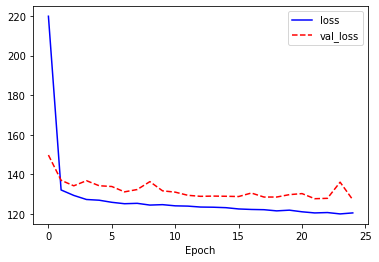

In [20]:
plt.plot(hist7.history['loss'], 'b-', label='loss')
plt.plot(hist7.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [23]:
model8 = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(Day.shape)),
    layers.Dense(64, activation='tanh'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

In [21]:
model8.compile(loss='mse', optimizer='adam')
hist8 = model8.fit(X_train_2, Y_train_2, epochs=10, batch_size=48, validation_split=0.25)
model8.evaluate(X_valid_2, Y_valid_2)

Epoch 1/10
615/615 [==============================] - 1s 1ms/step - loss: 427.9678 - val_loss: 151.3596
Epoch 2/10
615/615 [==============================] - 1s 1ms/step - loss: 141.2088 - val_loss: 137.7951
Epoch 3/10
615/615 [==============================] - 1s 1ms/step - loss: 141.7846 - val_loss: 136.4093
Epoch 4/10
615/615 [==============================] - 1s 1ms/step - loss: 137.8628 - val_loss: 135.8161
Epoch 5/10
615/615 [==============================] - 1s 1ms/step - loss: 137.7970 - val_loss: 135.5182
Epoch 6/10
615/615 [==============================] - 1s 1ms/step - loss: 134.4700 - val_loss: 139.7175
Epoch 7/10
615/615 [==============================] - 1s 1ms/step - loss: 134.6391 - val_loss: 137.5637
Epoch 8/10
615/615 [==============================] - 1s 1ms/step - loss: 133.0480 - val_loss: 133.3245
Epoch 9/10
615/615 [==============================] - 1s 1ms/step - loss: 133.8710 - val_loss: 132.5259
Epoch 10/10
410/410 [==============================] - 0s 641us/

131.81753540039062

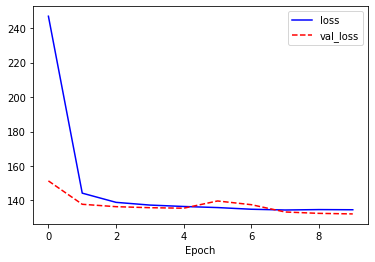

In [22]:
plt.plot(hist8.history['loss'], 'b-', label='loss')
plt.plot(hist8.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [25]:
results7 = pd.DataFrame()

for q in q_lst:
    model7.compile(loss=lambda y,pred: quantile_loss(q,y,pred), optimizer='adam')
    model7.fit(Day, Day7, epochs=25, batch_size=48, validation_split=0.25)
    pred = pd.DataFrame(model7.predict(df_test))
    results7 = pd.concat([results7, pred], axis=1)

results7.shape

Epoch 1/25
820/820 [==============================] - 1s 1ms/step - loss: 1.4695 - val_loss: 1.5751
Epoch 2/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3692 - val_loss: 1.5562
Epoch 3/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3468 - val_loss: 1.5557
Epoch 4/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3363 - val_loss: 1.5501
Epoch 5/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3417 - val_loss: 1.5650
Epoch 6/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3161 - val_loss: 1.6461
Epoch 7/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3212 - val_loss: 1.5654
Epoch 8/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3365 - val_loss: 1.5859
Epoch 9/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3255 - val_loss: 1.5950
Epoch 10/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3330 - val_loss: 1.5589

820/820 [==============================] - 1s 1ms/step - loss: 2.3534 - val_loss: 3.1271
Epoch 2/25
820/820 [==============================] - 1s 1ms/step - loss: 2.3076 - val_loss: 3.0675
Epoch 3/25
820/820 [==============================] - 1s 1ms/step - loss: 2.3067 - val_loss: 3.0831
Epoch 4/25
820/820 [==============================] - 1s 1ms/step - loss: 2.2701 - val_loss: 3.0643
Epoch 5/25
820/820 [==============================] - 1s 1ms/step - loss: 2.3026 - val_loss: 3.0820
Epoch 6/25
820/820 [==============================] - 1s 1ms/step - loss: 2.2752 - val_loss: 3.0484
Epoch 7/25
820/820 [==============================] - 1s 1ms/step - loss: 2.2841 - val_loss: 3.0567
Epoch 8/25
820/820 [==============================] - 1s 1ms/step - loss: 2.3274 - val_loss: 3.1001
Epoch 9/25
820/820 [==============================] - 1s 1ms/step - loss: 2.2624 - val_loss: 3.1070
Epoch 10/25
820/820 [==============================] - 1s 1ms/step - loss: 2.3179 - val_loss: 3.0013
Epoch 11/2

820/820 [==============================] - 1s 1ms/step - loss: 2.1213 - val_loss: 3.2217
Epoch 3/25
820/820 [==============================] - 1s 1ms/step - loss: 2.1380 - val_loss: 3.1589
Epoch 4/25
820/820 [==============================] - 1s 1ms/step - loss: 2.1284 - val_loss: 3.2005
Epoch 5/25
820/820 [==============================] - 1s 1ms/step - loss: 2.1213 - val_loss: 3.2320
Epoch 6/25
820/820 [==============================] - 1s 1ms/step - loss: 2.1260 - val_loss: 3.1724
Epoch 7/25
820/820 [==============================] - 1s 1ms/step - loss: 2.1366 - val_loss: 3.1728
Epoch 8/25
820/820 [==============================] - 1s 1ms/step - loss: 2.1613 - val_loss: 3.1897
Epoch 9/25
820/820 [==============================] - 1s 1ms/step - loss: 2.0959 - val_loss: 3.1757
Epoch 10/25
820/820 [==============================] - 1s 1ms/step - loss: 2.1534 - val_loss: 3.1981
Epoch 11/25
820/820 [==============================] - 1s 1ms/step - loss: 2.0578 - val_loss: 3.2083
Epoch 12/

820/820 [==============================] - 1s 1ms/step - loss: 1.5167 - val_loss: 2.6489
Epoch 8/25
820/820 [==============================] - 1s 1ms/step - loss: 1.5290 - val_loss: 2.5437
Epoch 9/25
820/820 [==============================] - 1s 1ms/step - loss: 1.4959 - val_loss: 2.5873
Epoch 10/25
820/820 [==============================] - 1s 1ms/step - loss: 1.5214 - val_loss: 2.5552
Epoch 11/25
820/820 [==============================] - 1s 1ms/step - loss: 1.4567 - val_loss: 2.6960
Epoch 12/25
820/820 [==============================] - 1s 1ms/step - loss: 1.4685 - val_loss: 2.5953
Epoch 13/25
820/820 [==============================] - 1s 1ms/step - loss: 1.4805 - val_loss: 2.5799
Epoch 14/25
820/820 [==============================] - 1s 1ms/step - loss: 1.4810 - val_loss: 2.5828
Epoch 15/25
820/820 [==============================] - 1s 1ms/step - loss: 1.4799 - val_loss: 2.5624
Epoch 16/25
820/820 [==============================] - 1s 1ms/step - loss: 1.4650 - val_loss: 2.5319
Epoc

820/820 [==============================] - 1s 1ms/step - loss: 0.6102 - val_loss: 1.4140
Epoch 13/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6172 - val_loss: 1.2930
Epoch 14/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6116 - val_loss: 1.4040
Epoch 15/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6103 - val_loss: 1.2799
Epoch 16/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6094 - val_loss: 1.2851
Epoch 17/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6076 - val_loss: 1.3351
Epoch 18/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6190 - val_loss: 1.3318
Epoch 19/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6112 - val_loss: 1.3762
Epoch 20/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6147 - val_loss: 1.3657
Epoch 21/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6065 - val_loss: 1.2910
Ep

(3888, 9)

In [26]:
results8 = pd.DataFrame()

for q in q_lst:
    model8.compile(loss=lambda y,pred: quantile_loss(q,y,pred), optimizer='adam')
    model8.fit(Day, Day8, epochs=25, batch_size=48, validation_split=0.25)
    pred = pd.DataFrame(model8.predict(df_test))
    results8 = pd.concat([results8, pred], axis=1)

results8.shape

Epoch 1/25
820/820 [==============================] - 2s 1ms/step - loss: 1.5062 - val_loss: 1.5976
Epoch 2/25
820/820 [==============================] - 1s 1ms/step - loss: 1.4142 - val_loss: 1.5571
Epoch 3/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3848 - val_loss: 1.5662
Epoch 4/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3682 - val_loss: 1.5434
Epoch 5/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3791 - val_loss: 1.5510
Epoch 6/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3681 - val_loss: 1.5615
Epoch 7/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3737 - val_loss: 1.5537
Epoch 8/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3756 - val_loss: 1.5650
Epoch 9/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3798 - val_loss: 1.5662
Epoch 10/25
820/820 [==============================] - 1s 1ms/step - loss: 1.3720 - val_loss: 1.5507

820/820 [==============================] - 1s 1ms/step - loss: 2.4991 - val_loss: 3.1482
Epoch 2/25
820/820 [==============================] - 1s 1ms/step - loss: 2.4600 - val_loss: 3.2207
Epoch 3/25
820/820 [==============================] - 1s 1ms/step - loss: 2.4701 - val_loss: 3.1357
Epoch 4/25
820/820 [==============================] - 1s 1ms/step - loss: 2.4379 - val_loss: 3.1721
Epoch 5/25
820/820 [==============================] - 1s 1ms/step - loss: 2.4444 - val_loss: 3.1680
Epoch 6/25
820/820 [==============================] - 1s 1ms/step - loss: 2.4066 - val_loss: 3.1348
Epoch 7/25
820/820 [==============================] - 1s 1ms/step - loss: 2.4487 - val_loss: 3.1703
Epoch 8/25
820/820 [==============================] - 1s 1ms/step - loss: 2.4290 - val_loss: 3.1919
Epoch 9/25
820/820 [==============================] - 1s 1ms/step - loss: 2.4209 - val_loss: 3.2050
Epoch 10/25
820/820 [==============================] - 1s 1ms/step - loss: 2.4151 - val_loss: 3.2071
Epoch 11/2

820/820 [==============================] - 1s 1ms/step - loss: 2.2712 - val_loss: 3.5000
Epoch 3/25
820/820 [==============================] - 1s 1ms/step - loss: 2.2790 - val_loss: 3.3869
Epoch 4/25
820/820 [==============================] - 1s 1ms/step - loss: 2.2778 - val_loss: 3.3665
Epoch 5/25
820/820 [==============================] - 1s 1ms/step - loss: 2.2651 - val_loss: 3.4013
Epoch 6/25
820/820 [==============================] - 1s 1ms/step - loss: 2.1964 - val_loss: 3.3441
Epoch 7/25
820/820 [==============================] - 1s 1ms/step - loss: 2.2485 - val_loss: 3.3808
Epoch 8/25
820/820 [==============================] - 1s 1ms/step - loss: 2.2448 - val_loss: 3.4334
Epoch 9/25
820/820 [==============================] - 1s 1ms/step - loss: 2.2266 - val_loss: 3.4500
Epoch 10/25
820/820 [==============================] - 1s 1ms/step - loss: 2.2503 - val_loss: 3.4369
Epoch 11/25
820/820 [==============================] - 1s 1ms/step - loss: 2.2142 - val_loss: 3.4408
Epoch 12/

820/820 [==============================] - 2s 2ms/step - loss: 1.5895 - val_loss: 2.8867
Epoch 8/25
820/820 [==============================] - 1s 2ms/step - loss: 1.5912 - val_loss: 2.7601
Epoch 9/25
820/820 [==============================] - 1s 1ms/step - loss: 1.5812 - val_loss: 2.9138
Epoch 10/25
820/820 [==============================] - 1s 1ms/step - loss: 1.6035 - val_loss: 2.8064
Epoch 11/25
820/820 [==============================] - 1s 1ms/step - loss: 1.5577 - val_loss: 2.7654
Epoch 12/25
820/820 [==============================] - 1s 1ms/step - loss: 1.5694 - val_loss: 2.8664
Epoch 13/25
820/820 [==============================] - 1s 1ms/step - loss: 1.5828 - val_loss: 2.7846
Epoch 14/25
820/820 [==============================] - 1s 1ms/step - loss: 1.5570 - val_loss: 2.8087
Epoch 15/25
820/820 [==============================] - 1s 1ms/step - loss: 1.5609 - val_loss: 2.7454
Epoch 16/25
820/820 [==============================] - 1s 1ms/step - loss: 1.5365 - val_loss: 2.7579
Epoc

820/820 [==============================] - 1s 1ms/step - loss: 0.6478 - val_loss: 1.4764
Epoch 13/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6447 - val_loss: 1.4923
Epoch 14/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6411 - val_loss: 1.4286
Epoch 15/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6406 - val_loss: 1.4475
Epoch 16/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6342 - val_loss: 1.4506
Epoch 17/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6477 - val_loss: 1.5273
Epoch 18/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6280 - val_loss: 1.6255
Epoch 19/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6434 - val_loss: 1.4261
Epoch 20/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6328 - val_loss: 1.4610
Epoch 21/25
820/820 [==============================] - 1s 1ms/step - loss: 0.6417 - val_loss: 1.4561
Ep

(3888, 9)

In [27]:
submission.loc[submission.id.str.contains("Day7"), "q_0.1":] = results7.sort_index().values
submission.loc[submission.id.str.contains("Day8"), "q_0.1":] = results8.sort_index().values
submission

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,-0.006363,-0.001344,-0.000477,-0.000091,0.000025,0.000019,0.000267,0.000341,-0.000128
1,0.csv_Day7_0h30m,-0.006583,-0.001250,-0.000477,-0.000091,0.000025,0.000019,0.000267,0.000341,-0.000128
2,0.csv_Day7_1h00m,-0.006424,-0.001127,-0.000477,-0.000091,0.000025,0.000019,0.000267,0.000341,-0.000128
3,0.csv_Day7_1h30m,-0.006452,-0.001205,-0.000477,-0.000091,0.000025,0.000019,0.000267,0.000341,-0.000128
4,0.csv_Day7_2h00m,-0.006089,-0.001196,-0.000477,-0.000091,0.000025,0.000019,0.000267,0.000341,-0.000128
...,...,...,...,...,...,...,...,...,...,...
7771,80.csv_Day8_21h30m,0.003785,-0.002122,-0.000005,0.000027,-0.000070,0.000049,0.000095,0.000096,0.000428
7772,80.csv_Day8_22h00m,0.003576,-0.002403,-0.000005,0.000027,-0.000070,0.000049,0.000095,0.000096,0.000428
7773,80.csv_Day8_22h30m,0.003818,-0.002303,-0.000005,0.000027,-0.000070,0.000049,0.000095,0.000096,0.000428
7774,80.csv_Day8_23h00m,0.003872,-0.002548,-0.000005,0.000027,-0.000070,0.000049,0.000095,0.000096,0.000428


In [29]:
submission[:48]

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,-0.006363,-0.001344,-0.000477,-0.000091,0.000025,0.000019,0.000267,0.000341,-0.000128
1,0.csv_Day7_0h30m,-0.006583,-0.001250,-0.000477,-0.000091,0.000025,0.000019,0.000267,0.000341,-0.000128
2,0.csv_Day7_1h00m,-0.006424,-0.001127,-0.000477,-0.000091,0.000025,0.000019,0.000267,0.000341,-0.000128
3,0.csv_Day7_1h30m,-0.006452,-0.001205,-0.000477,-0.000091,0.000025,0.000019,0.000267,0.000341,-0.000128
4,0.csv_Day7_2h00m,-0.006089,-0.001196,-0.000477,-0.000091,0.000025,0.000019,0.000267,0.000341,-0.000128
5,0.csv_Day7_2h30m,-0.006354,-0.001000,-0.000477,-0.000091,0.000025,0.000019,0.000267,0.000341,-0.000128
6,0.csv_Day7_3h00m,-0.006593,-0.000923,-0.000477,-0.000091,0.000025,0.000019,0.000267,0.000341,-0.000128
7,0.csv_Day7_3h30m,-0.007519,-0.000797,-0.000477,-0.000091,0.000025,0.000019,0.000267,0.000341,-0.000128
8,0.csv_Day7_4h00m,-0.008617,-0.000870,-0.000477,-0.000091,0.000025,0.000019,0.000267,0.000341,-0.000128
9,0.csv_Day7_4h30m,-0.010055,-0.000841,-0.000477,-0.000091,0.000025,0.000019,0.000267,0.000341,-0.000128


In [35]:
submission[:-48]

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.csv_Day7_0h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.csv_Day7_1h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.csv_Day7_1h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.csv_Day7_2h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7723,80.csv_Day7_21h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7724,80.csv_Day7_22h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7725,80.csv_Day7_22h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7726,80.csv_Day7_23h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
submission.to_csv('./submission/submission_20210115-1.csv', index=False)

In [34]:
submission.describe()

,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
count,7776.0,7776.0,7776.0,7776.0,7776.0,7776.0,7776.0,7776.0,7776.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
